## 고객 세그먼트

https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

In [7]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
# from sklearn.cluster import DBSCAN
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 경고메세지 끄기
import warnings
warnings.filterwarnings(action='ignore')

##########데이터 로드


df = pd.read_csv("./data/Mall_Customers.csv")


##########데이터 분석
##########데이터 전처리

df.drop('CustomerID', axis=1,inplace=True)

# Gender변수 가변수 처리
df1 = pd.get_dummies(df, columns = ['Gender'], drop_first=True)

# 데이터 정규화 적용
mm_scaler = MinMaxScaler()
minmax = mm_scaler.fit_transform(df1)

# 컬럼명 결합
df_minmax = pd.DataFrame(data=minmax, columns=df1.columns)

df_minmax.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,0.019231,0.000000,0.387755,1.0
1,0.057692,0.000000,0.816327,1.0
2,0.038462,0.008197,0.051020,0.0
3,0.096154,0.008197,0.775510,0.0
4,0.250000,0.016393,0.397959,0.0


In [8]:
df_minmax.boxplot()

<Axes: >

## K 찾기

## 엘보차트

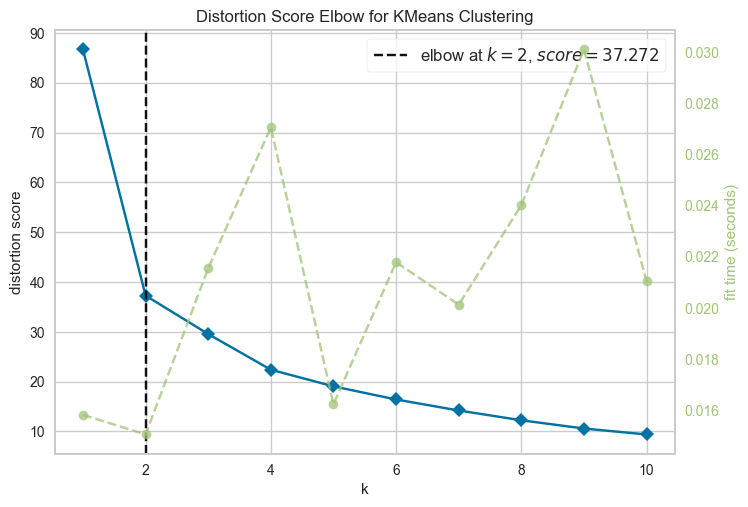

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [12]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()

Elbow_Chart = KElbowVisualizer(model, k=(1,11))
Elbow_Chart.fit(minmax)
Elbow_Chart.show()

2, 4 지점에서 꺾임.
2지점이 주요하게 나온 이유는 성별 변수 때문이지 않을끼? 그게 제일 그룹핑하기 빠르니까

## 실루엣 분석

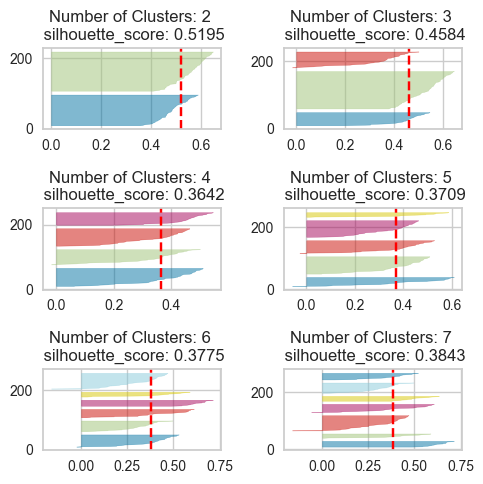

In [13]:
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.pyplot as plt

fig,ax = plt.subplots(3,2,figsize=(5,5))
for i in range(2,8):   # k = 2,3,4,5, 6, 7 일때의 실루엣 분석을 시도
    q,mod = divmod(i,2)
    model = KMeans(n_clusters=i,random_state=3)

    visualizer = SilhouetteVisualizer(model, colors='yellowbrick',ax=ax[q-1][mod])
    visualizer.fit(minmax)    

    score = silhouette_score(minmax, model.labels_)
    # print(f'실루엣 스코어(1에 근접해야 좋음): {score}')
    ax[q - 1][mod].set_title(f'Number of Clusters: {i} \n silhouette_score: {score:.4f}')

plt.tight_layout()
plt.show()    

### 실루엣 스코어가 가장 높은 건 k = 2 ,하지만 고르게 발달한 것은 k = 4
## 2개의 군집은 더 세분화할 수 있을 만큼 각 데이터가 많이 포함되어 있다.
## 4개의 군집에서는 관측치가 비교적 균등하게 나뉘며, 실루엣 계수의 편차도 고른편임..


```
내가 찾은 k는? 4
```

In [15]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
# from sklearn.cluster import DBSCAN
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 경고메세지 끄기
import warnings
warnings.filterwarnings(action='ignore')

##########데이터 로드


df = pd.read_csv("./data/Mall_Customers.csv")



##########데이터 분석
##########데이터 전처리

df.drop('CustomerID', axis=1,inplace=True)

# Gender변수 가변수 처리
df1 = pd.get_dummies(df, columns = ['Gender'], drop_first=True)

# 데이터 정규화 적용
mm_scaler = MinMaxScaler()
minmax = mm_scaler.fit_transform(df1)

# 컬럼명 결합
df_minmax = pd.DataFrame(data=minmax, columns=df1.columns)

##########모델 생성

model = KMeans(n_clusters=4) #알맞은 클러스터 갯수는?

##########모델 학습

model.fit(df_minmax)

##########모델 검증

print(f'inertia(작을수록) : {model.inertia_}') #78.94084142614601 #관성값: 샘플과 클러스터간 거리 제곱 합, 작을수록 좋음
print(f'silhouette_score(1에 가까울수록) : {silhouette_score(minmax, model.predict(minmax))}') ##0.5003019230876485 #실루엣 계수: 군집간 거리는 멀고 군집내 거리는 가까울수록 점수 높음 (0~1), 0.5 보다 크면 클러스터링이 잘 된거라 평가

##########모델 예측

print(model.labels_) #[1 1 1 2 2 1 0 0 0 2 0 1]

y_predict = model.predict(minmax)



inertia(작을수록) : 22.390960011928552
silhouette_score(1에 가까울수록) : 0.3641657522339062
[1 1 0 2 2 2 0 2 3 2 3 2 0 2 3 1 0 1 3 2 3 1 0 1 0 1 0 1 0 2 3 2 3 1 0 2 0
 2 0 2 0 1 3 2 0 2 0 2 2 2 0 1 2 3 0 3 0 3 2 3 3 1 0 0 3 1 0 0 1 2 3 0 0 0
 3 1 0 3 2 0 3 1 3 0 2 3 0 2 2 0 0 1 3 0 2 1 0 2 3 1 2 0 3 1 3 2 0 3 3 3 3
 2 0 1 2 2 0 0 0 0 1 0 2 1 2 2 3 1 3 1 3 1 2 2 3 2 0 1 3 2 0 1 2 2 3 1 3 2
 0 1 3 1 0 2 0 2 3 2 3 2 0 2 3 2 3 2 3 2 0 1 3 1 3 1 0 2 3 1 3 1 0 2 3 2 0
 1 0 1 0 2 0 2 3 2 0 2 0 1 3 1]


In [16]:
df1

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0
...,...,...,...,...
195,35,120,79,0
196,45,126,28,0
197,32,126,74,1
198,32,137,18,1


In [18]:
df1['Cluster'] = model.labels_

In [19]:
df1.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,Cluster
0,19,15,39,1,1
1,21,15,81,1,1
2,20,16,6,0,0
3,23,16,77,0,2
4,31,17,40,0,2


In [20]:
df1.groupby('Cluster').count()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
Cluster,,,,
0,55,55,55,55
1,40,40,40,40
2,57,57,57,57
3,48,48,48,48


In [21]:
# 실루엣 분석 metric 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score

# 모든 개별 데이터에 실루엣 계수값을 구함. 
score_samples = silhouette_samples(minmax, df1['Cluster'])
df1['silhouette_coeff'] = score_samples
df1.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,Cluster,silhouette_coeff
0,19,15,39,1,1,0.244976
1,21,15,81,1,1,0.465892
2,20,16,6,0,0,0.010117
3,23,16,77,0,2,0.420871
4,31,17,40,0,2,0.060785


In [22]:
# 각 클러스터별 실루엣 계수 평균
df1.groupby('Cluster')['silhouette_coeff'].mean()

Cluster
0    0.332338
1    0.442321
2    0.374693
3    0.323004
Name: silhouette_coeff, dtype: float64

## 시각화

In [23]:
from sklearn.decomposition import PCA

transformer = PCA(n_components=2)

df1['pca_x'] = transformer.fit_transform(minmax)[:,0]
df1['pca_y'] = transformer.fit_transform(minmax)[:,1]
df1.head()


,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,Cluster,silhouette_coeff,pca_x,pca_y
0,19,15,39,1,1,0.244976,0.532955,-0.227841
1,21,15,81,1,1,0.465892,0.513939,-0.493080
2,20,16,6,0,0,0.010117,-0.446266,0.087079
3,23,16,77,0,2,0.420871,-0.478796,-0.366617
4,31,17,40,0,2,0.060785,-0.451984,0.003006


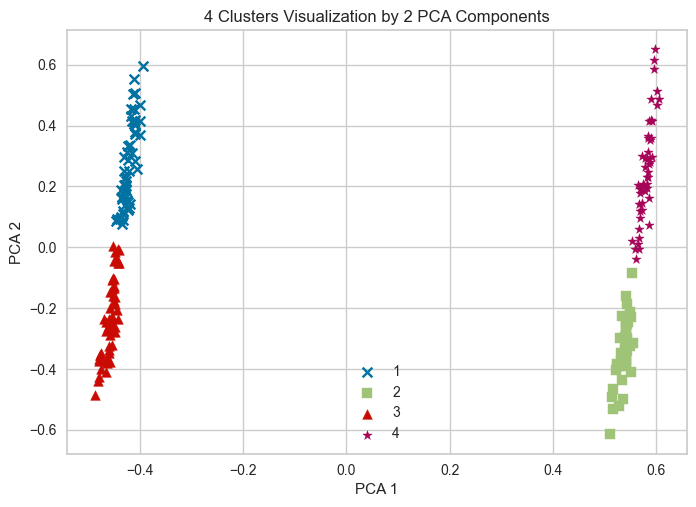

In [24]:
# cluster 값이 0, 1, 2 인 경우마다 별도의 Index로 추출
marker0_ind = df1[df1['Cluster']==0].index
marker1_ind = df1[df1['Cluster']==1].index
marker2_ind = df1[df1['Cluster']==2].index
marker3_ind = df1[df1['Cluster']==3].index

# cluster값 0, 1, 2,3에 해당하는 Index로 각 cluster 레벨의 pca_x, pca_y 값 추출. x, s, ^ 로 marker 표시
plt.scatter(x=df1.loc[marker0_ind,'pca_x'], y=df1.loc[marker0_ind,'pca_y'], marker='x', label='1') 
plt.scatter(x=df1.loc[marker1_ind,'pca_x'], y=df1.loc[marker1_ind,'pca_y'], marker='s',label='2')
plt.scatter(x=df1.loc[marker2_ind,'pca_x'], y=df1.loc[marker2_ind,'pca_y'], marker='^',label='3')
plt.scatter(x=df1.loc[marker3_ind,'pca_x'], y=df1.loc[marker3_ind,'pca_y'], marker='*',label='4')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('4 Clusters Visualization by 2 PCA Components')
plt.legend()
plt.show()

In [25]:
from sklearn.decomposition import PCA

transformer = PCA(n_components=3)
df_3D = df1.copy()

df_3D['pca_x'] = transformer.fit_transform(minmax)[:,0]
df_3D['pca_y'] = transformer.fit_transform(minmax)[:,1]
df_3D['pca_z'] = transformer.fit_transform(minmax)[:,2]

df_3D.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,Cluster,silhouette_coeff,pca_x,pca_y,pca_z
0,19,15,39,1,1,0.244976,0.532955,-0.227841,0.321860
1,21,15,81,1,1,0.465892,0.513939,-0.493080,-0.016202
2,20,16,6,0,0,0.010117,-0.446266,0.087079,0.555761
3,23,16,77,0,2,0.420871,-0.478796,-0.366617,-0.010714
4,31,17,40,0,2,0.060785,-0.451984,0.003006,0.159208


pip install plotly

In [41]:
import plotly.express as px
fig = px.scatter_3d(df_3D, x='pca_x', y='pca_y', z='pca_z',color='Cluster')
fig.show()